In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import PIL
from PIL import Image
from sklearn.model_selection import GroupKFold, StratifiedKFold, train_test_split

In [17]:
train_csv_path = '/home/rick/Dropbox/python_projects/data_science/Kaggle/cassava/BaseModel/data/cassava/split/train_5folds.csv'
merged_csv_path = '/home/rick/Dropbox/python_projects/data_science/Kaggle/cassava/BaseModel/data/cassava/split/merged.csv'

In [18]:
train = pd.read_csv(train_csv_path)

In [19]:
train

,image_id,class_id,fold,image_path
0,1000015157.jpg,0,3.0,/home/rick/Dropbox/python_projects/data_scienc...
1,1000201771.jpg,3,1.0,/home/rick/Dropbox/python_projects/data_scienc...
2,100042118.jpg,1,0.0,/home/rick/Dropbox/python_projects/data_scienc...
3,1000723321.jpg,1,3.0,/home/rick/Dropbox/python_projects/data_scienc...
4,1000812911.jpg,3,4.0,/home/rick/Dropbox/python_projects/data_scienc...
...,...,...,...,...
21392,999068805.jpg,3,2.0,/home/rick/Dropbox/python_projects/data_scienc...
21393,999329392.jpg,3,0.0,/home/rick/Dropbox/python_projects/data_scienc...
21394,999474432.jpg,1,0.0,/home/rick/Dropbox/python_projects/data_scienc...
21395,999616605.jpg,4,4.0,/home/rick/Dropbox/python_projects/data_scienc...


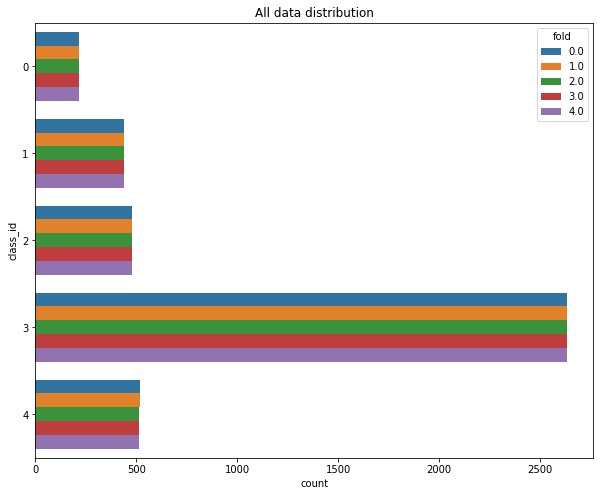

In [21]:
plt.figure(figsize=(10, 8))
plt.title('All data distribution')
sn.countplot(y="class_id", data=train, hue='fold');

In [13]:
merged_df = pd.read_csv(merged_csv_path)

In [14]:
merged_df

,image_id,label,source
0,1000015157.jpg,0,2020
1,1000201771.jpg,3,2020
2,100042118.jpg,1,2020
3,1000723321.jpg,1,2020
4,1000812911.jpg,3,2020
...,...,...,...
26332,train-cbb-114.jpg,0,2019
26333,train-cmd-661.jpg,3,2019
26334,train-cmd-1716.jpg,3,2019
26335,train-healthy-236.jpg,4,2019


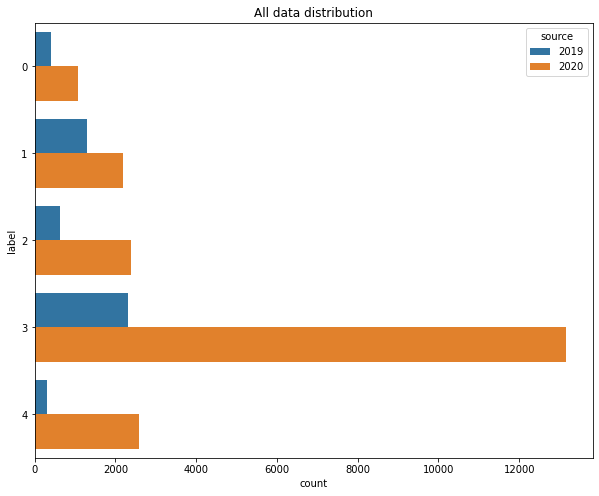

In [16]:
plt.figure(figsize=(10, 8))
plt.title('All data distribution')
sn.countplot(y="label", data=merged_df, hue='source');

In [23]:
merged_df['stratify_group'] = merged_df['label'].apply(str) + '_' + merged_df['source'].apply(str)

In [24]:
merged_df

,image_id,label,source,stratify_group
0,1000015157.jpg,0,2020,0_2020
1,1000201771.jpg,3,2020,3_2020
2,100042118.jpg,1,2020,1_2020
3,1000723321.jpg,1,2020,1_2020
4,1000812911.jpg,3,2020,3_2020
...,...,...,...,...
26332,train-cbb-114.jpg,0,2019,0_2019
26333,train-cmd-661.jpg,3,2019,3_2019
26334,train-cmd-1716.jpg,3,2019,3_2019
26335,train-healthy-236.jpg,4,2019,4_2019


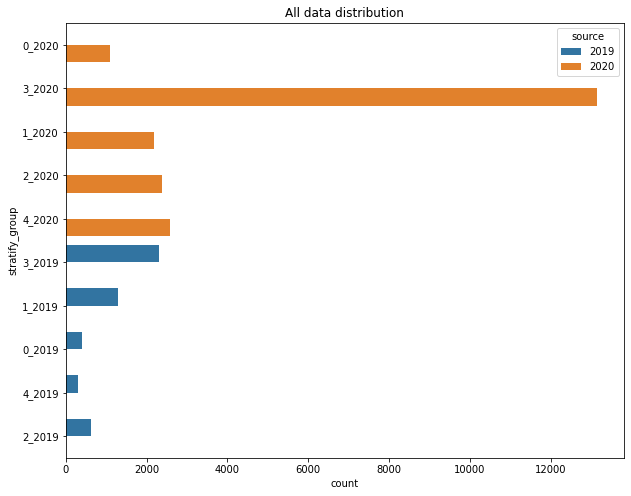

In [26]:
plt.figure(figsize=(10, 8))
plt.title('All data distribution')
sn.countplot(y="stratify_group", data=merged_df, hue='source');

In [28]:
# out_csv_path = '/home/rick/Dropbox/python_projects/data_science/Kaggle/cassava/BaseModel/data/cassava/split/merged_v2.csv'
# merged_df.to_csv(out_csv_path, index=False)

In [2]:
merged_fold_csv_path = '/home/rick/Dropbox/python_projects/data_science/Kaggle/cassava/BaseModel/data/cassava/split/merged_5folds.csv'

In [3]:
merged_fold_df = pd.read_csv(merged_fold_csv_path)

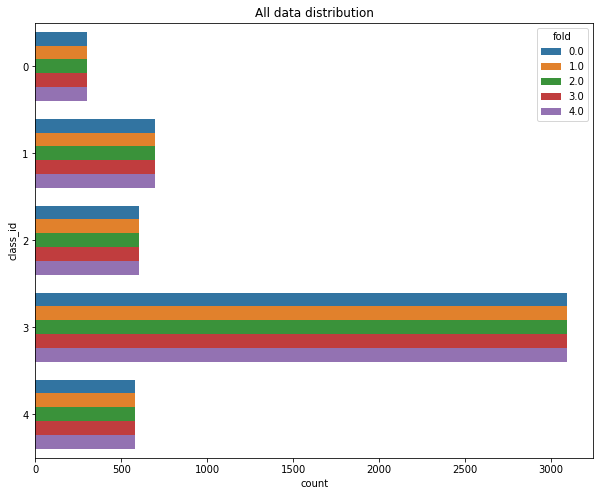

In [32]:
plt.figure(figsize=(10, 8))
plt.title('All data distribution')
sn.countplot(y="class_id", data=merged_fold_df, hue='fold');

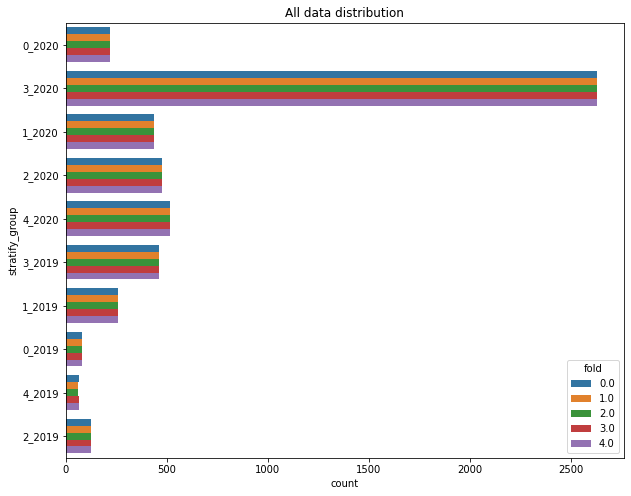

In [33]:
plt.figure(figsize=(10, 8))
plt.title('All data distribution')
sn.countplot(y="stratify_group", data=merged_fold_df, hue='fold');

In [4]:
merged_fold_df

,image_id,class_id,source,stratify_group,fold,image_path
0,1000015157.jpg,0,2020,0_2020,3.0,/home/rick/Dropbox/python_projects/data_scienc...
1,1000201771.jpg,3,2020,3_2020,1.0,/home/rick/Dropbox/python_projects/data_scienc...
2,100042118.jpg,1,2020,1_2020,0.0,/home/rick/Dropbox/python_projects/data_scienc...
3,1000723321.jpg,1,2020,1_2020,3.0,/home/rick/Dropbox/python_projects/data_scienc...
4,1000812911.jpg,3,2020,3_2020,4.0,/home/rick/Dropbox/python_projects/data_scienc...
...,...,...,...,...,...,...
26332,train-cbb-114.jpg,0,2019,0_2019,1.0,/home/rick/Dropbox/python_projects/data_scienc...
26333,train-cmd-661.jpg,3,2019,3_2019,1.0,/home/rick/Dropbox/python_projects/data_scienc...
26334,train-cmd-1716.jpg,3,2019,3_2019,1.0,/home/rick/Dropbox/python_projects/data_scienc...
26335,train-healthy-236.jpg,4,2019,4_2019,0.0,/home/rick/Dropbox/python_projects/data_scienc...


In [5]:
del merged_fold_df['image_path']

In [6]:
merged_fold_df

,image_id,class_id,source,stratify_group,fold
0,1000015157.jpg,0,2020,0_2020,3.0
1,1000201771.jpg,3,2020,3_2020,1.0
2,100042118.jpg,1,2020,1_2020,0.0
3,1000723321.jpg,1,2020,1_2020,3.0
4,1000812911.jpg,3,2020,3_2020,4.0
...,...,...,...,...,...
26332,train-cbb-114.jpg,0,2019,0_2019,1.0
26333,train-cmd-661.jpg,3,2019,3_2019,1.0
26334,train-cmd-1716.jpg,3,2019,3_2019,1.0
26335,train-healthy-236.jpg,4,2019,4_2019,0.0


In [7]:
out_csv_path = '/home/rick/Dropbox/python_projects/data_science/Kaggle/cassava/BaseModel/data/cassava/split/kaggle/merged_5folds.csv'
merged_fold_df.to_csv(out_csv_path, index=False)